# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [2]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df
        

In [3]:
smiles = ['smile_1.csv']
neutrals = ['neutral_1.csv']
frowns = ['frown_1.csv']

In [5]:
stated_dfs = []
# for smile in smiles:
#     stated_dfs.append(create_df(1, "csvs/{}".format(smile)))
    

for neutral in neutrals:
    stated_dfs.append(create_df(0, "csvs/{}".format(neutral)))
    
for frown in frowns:
    stated_dfs.append(create_df(2,"csvs/{}".format(frown)))


## Put it all together

In [6]:
all_df = pd.concat(stated_dfs)

In [7]:
all_df['state'] = all_df['state'].astype('int')
y = np.asarray(all_df['state'])
y [0:5]

array([0, 0, 0, 0, 0])

In [8]:
just_x_df = all_df.drop('state', axis = 1)

In [9]:
just_x_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z464,x465,y465,z465,x466,y466,z466,x467,y467,z467
0,0.703097,0.374607,-0.014928,0.707815,0.343145,-0.043393,0.705376,0.350614,-0.018745,0.702850,...,-0.008677,0.725287,0.268393,-0.014276,0.774523,0.253442,0.003477,0.779015,0.249255,0.003549
1,0.704148,0.373059,-0.015727,0.709489,0.341678,-0.044194,0.706536,0.349275,-0.019146,0.704383,...,-0.008249,0.726309,0.267122,-0.014034,0.775326,0.252454,0.005612,0.779860,0.248770,0.005774
2,0.703190,0.371561,-0.016583,0.708766,0.340069,-0.044559,0.705751,0.347705,-0.019676,0.703685,...,-0.007240,0.725503,0.264855,-0.013150,0.774145,0.250937,0.006591,0.778760,0.247536,0.006749
3,0.699402,0.367712,-0.016635,0.703843,0.337116,-0.043930,0.701474,0.344564,-0.019443,0.699010,...,-0.006720,0.721376,0.260301,-0.012488,0.771078,0.244425,0.006487,0.775583,0.241418,0.006527
4,0.690355,0.361750,-0.017999,0.693952,0.329829,-0.044606,0.692392,0.338366,-0.020310,0.689787,...,-0.006239,0.713731,0.254812,-0.011991,0.764881,0.240276,0.005111,0.769618,0.236949,0.005044


In [10]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 0.70309663,  0.37460691, -0.01492808, ...,  0.77901477,
         0.24925493,  0.00354899],
       [ 0.70414752,  0.37305862, -0.01572722, ...,  0.77985978,
         0.24876979,  0.00577418],
       [ 0.70319015,  0.37156102, -0.01658256, ...,  0.77876019,
         0.24753579,  0.00674865],
       [ 0.69940209,  0.36771181, -0.0166353 , ...,  0.77558339,
         0.24141781,  0.0065271 ],
       [ 0.69035482,  0.36174989, -0.01799892, ...,  0.76961762,
         0.23694909,  0.00504352]])

In [11]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [14]:
fit_models


{}

In [15]:
gb_train = {}
gb_train['pipeline'] = pipelines['gb']

In [16]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in gb_train.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [   0    1    2 ... 3030 3032 3033] Validation: [   8   12   13   14   16   21   24   35   38   40   43   51   55   61
   64   69   75   78   91   94   96   97  102  110  130  132  138  144
  146  155  167  170  177  180  187  189  192  201  211  212  215  218
  231  237  238  245  246  254  256  276  277  279  281  286  288  300
  306  313  323  330  335  337  340  344  346  349  351  363  367  370
  376  393  395  397  400  405  420  422  423  424  425  426  437  440
  446  449  451  469  503  504  509  518  520  523  550  551  552  553
  565  568  573  576  577  581  583  590  600  606  609  610  643  649
  652  653  654  661  673  683  686  687  688  692  697  698  700  701
  706  707  719  723  724  742  743  744  751  753  766  767  769  773
  776  780  782  783  784  787  796  807  808  813  815  833  852  857
  858  860  866  869  870  872  878  883  893  895  906  908  910  918
  919  923  933  939  943  947  951  953  956  957  966  969  987  988
  991  994  998 1005 1

Train: [   0    1    2 ... 3030 3031 3033] Validation: [   5   10   11   22   27   29   32   45   46   47   53   58   66   67
   81   92   95  100  104  113  120  123  127  135  142  149  151  153
  156  160  164  166  178  193  196  202  204  208  210  219  221  225
  228  230  235  239  249  259  269  274  278  282  289  291  293  305
  307  311  312  314  321  329  331  332  334  336  338  350  352  356
  357  359  374  386  389  390  399  401  407  409  432  441  442  452
  455  458  459  460  462  468  470  473  479  480  482  488  490  502
  505  507  510  514  525  526  527  531  532  540  546  549  554  560
  574  580  585  589  594  601  603  611  614  617  618  622  627  635
  641  647  648  650  656  658  662  664  667  668  670  675  677  679
  690  696  704  711  712  717  718  727  735  745  746  755  760  761
  763  770  779  781  790  805  811  825  827  830  835  840  848  853
  859  863  865  868  873  879  881  888  891  900  902  911  917  927
  928  929  936  946  

Train: [   0    1    2 ... 3029 3031 3033] Validation: [   7   19   24   29   31   32   44   47   49   50   57   60   63   66
   67   68   69   76   79   80   83   84   93   99  101  112  117  127
  130  131  132  138  140  144  146  154  155  161  164  167  173  174
  177  178  179  184  196  203  205  207  209  231  232  233  235  242
  250  252  258  264  265  268  271  274  277  278  281  286  294  302
  313  327  332  342  343  346  347  350  366  378  388  389  390  407
  414  415  417  422  423  434  435  439  448  452  469  470  479  480
  481  482  489  490  492  493  496  497  498  512  526  527  530  531
  532  541  548  553  561  563  564  567  569  571  581  583  585  610
  619  621  622  625  626  640  648  650  665  668  671  672  673  674
  677  678  683  684  685  689  691  704  717  721  726  727  730  739
  743  746  780  781  782  787  789  790  811  813  819  829  832  833
  836  839  841  842  844  845  851  859  860  881  882  884  886  890
  891  892  897  902  

Train: [   0    1    2 ... 3030 3031 3032] Validation: [   3   11   13   18   20   21   27   30   33   37   46   55   61   65
   74   75   77   86   95  103  106  115  121  134  139  143  147  153
  165  168  169  172  180  194  195  198  201  202  218  219  220  224
  227  237  245  259  269  270  275  280  283  285  289  299  304  308
  309  311  323  340  351  367  369  374  375  376  381  382  396  399
  426  427  428  431  433  444  446  450  451  477  485  486  494  495
  499  509  511  513  520  523  534  536  540  543  544  551  554  557
  558  576  580  582  588  595  599  624  632  638  645  646  647  651
  654  655  658  659  661  662  669  670  676  682  686  687  693  697
  702  705  711  718  720  722  737  738  740  744  745  750  752  756
  761  764  770  788  792  798  807  808  814  817  822  825  827  838
  853  863  866  869  871  877  878  883  887  900  903  923  929  944
  946  949  950  951  954  958  959  963  968  971  977  984  988  994
  997 1003 1009 1010 1

Train: [   0    1    2 ... 3031 3032 3033] Validation: [   3   10   12   14   18   23   32   34   53   57   60   66   67   71
   82   83   84   87   91   93   94   99  104  112  116  117  118  131
  134  138  141  145  148  156  159  163  166  176  178  185  189  208
  212  213  220  224  227  233  234  236  237  253  268  273  276  288
  290  294  295  297  298  311  313  315  329  334  337  338  350  352
  355  356  357  361  363  370  371  382  391  395  404  405  407  409
  414  423  427  428  429  430  435  437  446  456  463  469  473  478
  482  485  490  497  498  511  514  527  532  534  536  538  545  548
  554  557  558  568  570  575  577  587  590  592  595  600  606  609
  623  624  635  643  652  678  686  695  702  710  720  727  731  733
  737  738  744  747  748  752  755  762  763  764  765  777  782  783
  786  793  799  809  821  831  835  836  837  840  841  857  866  872
  874  881  883  890  899  900  907  913  929  934  938  943  949  951
  952  953  958  962  

Train: [   0    1    2 ... 3027 3028 3033] Validation: [   5    6    7   17   18   20   22   23   28   33   36   44   50   51
   57   58   62   73   74   75   78   79   80  102  103  108  114  118
  126  127  132  133  137  138  141  147  158  159  160  165  168  173
  179  185  195  212  218  222  236  246  253  260  275  277  282  286
  289  291  294  303  306  313  322  323  330  335  344  347  352  360
  364  366  368  370  371  372  375  378  386  390  398  413  420  422
  437  446  447  453  462  466  468  469  476  483  487  501  506  507
  509  520  529  531  540  543  545  553  556  559  564  569  575  576
  579  580  587  608  612  614  621  622  623  627  630  634  638  655
  660  661  664  666  667  673  679  689  693  695  700  702  703  706
  709  712  713  717  722  724  725  730  734  742  743  746  748  760
  761  762  772  774  776  782  784  785  793  801  807  816  818  832
  838  840  842  843  850  853  866  872  881  885  892  893  903  912
  913  915  917  929  

Train: [   0    1    2 ... 3030 3031 3032] Validation: [   8   11   15   16   25   34   43   47   52   59   60   69   76   77
   81   82   86   87   90   91   97  101  104  106  120  130  131  134
  139  140  144  151  152  156  157  164  174  186  192  194  197  201
  205  209  227  232  234  237  243  245  247  250  261  263  270  281
  285  290  293  299  305  310  321  326  332  337  339  343  345  359
  369  374  379  383  394  396  399  408  409  412  414  418  419  429
  431  434  440  441  448  454  459  460  461  463  467  471  473  482
  489  490  491  496  505  516  522  525  526  528  534  548  552  554
  560  565  567  574  577  586  589  592  594  598  604  605  606  607
  609  617  620  641  644  647  649  652  663  670  675  677  685  686
  688  692  708  710  718  727  732  733  738  739  741  744  745  751
  757  766  769  770  779  783  788  796  798  804  808  819  834  835
  837  839  849  854  856  859  864  877  878  886  889  894  902  918
  920  924  930  931  

Train: [   0    2    3 ... 3030 3031 3033] Validation: [   1    4    5    6    9   14   16   19   20   32   40   41   49   65
   68   76   77   79   83   86   88   90   91   92  106  107  109  112
  115  116  117  124  125  129  139  150  151  160  163  168  176  181
  182  194  198  202  212  213  215  216  219  221  224  225  231  236
  238  240  249  252  263  273  274  290  294  298  303  311  312  314
  321  325  335  341  344  352  356  364  365  370  374  377  383  387
  393  395  406  407  412  413  414  415  421  424  427  436  438  447
  449  452  454  455  469  475  478  492  498  508  513  514  520  525
  532  548  559  561  562  565  573  581  590  593  600  602  607  614
  617  619  625  639  642  646  647  648  653  655  658  659  664  666
  675  687  689  700  718  726  732  734  737  738  739  756  769  772
  777  780  794  795  798  799  807  808  819  822  832  834  842  846
  849  859  861  863  864  866  868  869  872  881  883  887  892  896
  897  899  903  907  

Train: [   1    2    4 ... 3031 3032 3033] Validation: [   0    3    7    8   10   22   26   27   33   38   39   42   46   47
   50   52   53   62   82   84   85   89   98   99  104  113  122  123
  128  138  161  164  165  166  171  173  178  179  180  187  190  211
  230  234  239  241  244  250  255  256  264  276  289  292  295  297
  299  307  316  318  319  320  326  329  345  349  357  359  361  362
  366  367  369  371  372  378  385  388  390  391  392  398  400  402
  408  410  417  418  419  423  433  453  459  465  474  495  496  497
  499  504  507  511  516  521  523  524  530  535  536  539  540  544
  545  550  551  566  568  569  572  574  576  583  585  586  589  595
  598  601  603  610  615  620  627  631  633  637  652  654  660  663
  665  670  677  686  690  704  710  711  714  719  721  729  740  741
  742  745  747  748  755  758  760  761  762  763  776  788  792  793
  797  806  809  815  816  830  831  837  838  839  840  848  852  855
  856  862  876  877  

Train: [   0    2    3 ... 3030 3032 3033] Validation: [   1    5    6   10   12   21   31   36   39   41   45   46   49   50
   52   53   54   60   62   64   69   74   76   88   89   91   97   99
  100  112  113  115  117  121  122  126  140  149  152  159  164  166
  177  179  188  189  197  199  202  205  208  211  215  228  230  235
  236  253  258  263  266  283  287  302  312  317  319  322  335  336
  339  345  346  347  350  351  356  363  367  368  371  372  374  375
  377  380  387  395  402  406  413  415  417  418  420  428  429  432
  441  448  457  458  469  477  479  481  482  491  499  504  507  518
  526  527  529  530  534  549  561  563  565  569  579  586  602  611
  616  617  625  632  655  658  661  664  665  669  671  675  676  686
  688  697  700  702  703  704  705  707  708  715  716  717  719  722
  727  729  743  750  756  763  765  767  768  773  775  779  781  788
  790  797  801  813  814  820  824  825  830  832  833  834  838  842
  847  852  853  857  

Train: [   0    2    5 ... 3030 3032 3033] Validation: [   1    3    4    7   10   14   23   24   34   38   41   42   44   53
   54   58   72   80  111  122  125  126  148  149  171  173  180  186
  188  191  192  202  215  216  225  227  235  237  239  249  250  253
  268  270  274  275  278  281  289  290  295  299  303  309  312  314
  321  323  325  346  348  352  353  358  360  370  375  376  378  388
  394  408  412  415  419  420  424  433  434  436  437  439  440  444
  448  450  453  454  457  460  475  476  477  484  497  498  507  512
  520  537  538  546  547  555  564  572  573  575  578  580  585  590
  592  596  600  601  608  615  623  626  627  631  633  638  651  652
  653  664  666  671  676  677  678  680  682  692  696  702  709  714
  721  728  730  732  734  735  739  744  749  758  761  766  768  775
  776  784  789  805  835  845  847  849  851  854  856  860  863  868
  872  876  878  881  886  887  889  891  896  901  906  908  909  911
  913  922  933  943  

Train: [   1    2    3 ... 3031 3032 3033] Validation: [   0    5    6   13   19   26   45   47   49   52   55   59   60   61
   66   68   71   75   81   82   84   88   93   94   97  100  101  104
  108  116  123  124  127  132  135  140  147  151  157  160  161  184
  185  193  197  203  211  212  214  219  228  236  240  241  242  252
  259  263  276  277  284  285  291  301  306  322  329  330  331  333
  334  335  341  343  357  368  372  379  384  387  391  398  401  403
  406  409  411  413  414  428  429  435  438  451  455  459  471  474
  479  480  481  483  485  494  499  501  508  510  513  518  521  545
  550  556  558  560  561  562  565  577  591  599  602  613  618  619
  629  634  636  644  646  649  659  660  662  670  672  673  674  689
  693  700  703  708  715  717  722  726  729  733  736  746  751  778
  783  786  791  795  797  800  801  802  807  814  820  827  828  829
  830  839  842  844  848  852  853  865  867  873  874  880  884  888
  892  900  904  907  

Train: [   0    1    2 ... 3029 3030 3031] Validation: [   3    7   15   16   27   33   45   47   53   61   68   80   83   86
   89   97  100  110  112  116  118  119  122  130  132  134  138  148
  153  168  173  174  176  177  183  204  205  206  211  215  218  229
  234  237  244  250  259  260  261  264  290  292  294  299  303  312
  320  321  324  327  349  353  360  362  371  378  379  382  406  408
  412  413  414  415  416  418  421  427  432  434  438  460  465  466
  475  483  490  496  501  509  511  512  518  522  531  535  537  542
  548  549  555  557  562  572  573  588  589  594  598  601  604  612
  615  616  625  627  628  636  639  647  651  654  655  658  660  663
  673  686  698  701  709  716  720  724  725  728  729  738  741  757
  762  768  774  781  782  790  794  800  803  804  805  807  808  815
  818  822  838  847  848  851  852  855  857  860  861  875  884  895
  899  900  901  903  917  922  924  925  928  930  931  935  937  947
  949  954  955  959  

Train: [   0    1    2 ... 3031 3032 3033] Validation: [   4    5   12   13   19   23   34   36   39   42   44   46   51   52
   69   72   73   77   81   82   85   93   94   96   99  101  102  103
  104  106  109  111  120  121  136  154  156  160  165  170  175  178
  179  184  186  187  193  194  198  208  210  221  226  231  233  235
  236  239  241  245  247  249  256  257  258  263  266  268  269  279
  280  287  289  296  297  305  306  307  309  314  340  342  347  355
  358  359  363  365  367  369  377  386  388  391  400  402  409  425
  433  448  450  454  456  459  461  462  471  480  499  506  513  521
  523  524  529  543  544  550  565  566  569  578  580  583  584  586
  590  592  593  595  596  597  599  605  609  610  620  623  626  637
  638  642  643  646  650  652  670  672  675  679  680  683  688  690
  691  694  697  699  711  713  721  730  731  734  737  740  750  758
  764  771  779  792  798  813  816  817  826  829  832  833  836  842
  846  862  863  867  

Train: [   0    1    3 ... 3031 3032 3033] Validation: [   2    7   10   16   20   22   33   38   43   51   52   58   63   68
   71   74   75   77   85   87   88   93   95   98  102  107  110  112
  114  126  133  135  157  159  160  167  169  177  194  195  203  207
  210  216  232  233  242  249  251  253  260  262  268  271  273  276
  277  282  283  286  291  292  294  296  299  314  322  324  327  330
  331  333  337  342  344  346  359  362  364  368  376  377  386  387
  393  395  399  400  412  431  433  435  436  449  454  460  461  464
  468  475  476  479  480  490  493  507  525  526  530  535  572  577
  580  581  583  585  592  595  606  607  617  630  642  646  648  649
  652  656  661  663  664  665  672  694  697  698  700  701  704  706
  712  726  727  729  730  733  747  748  779  792  795  796  797  800
  815  817  818  840  844  847  851  855  860  877  882  887  889  894
  895  896  904  912  942  950  952  954  959  966  969  979  985  986
  997  998 1005 1006 1

Train: [   0    1    2 ... 3031 3032 3033] Validation: [   5    6   10   11   12   16   21   22   26   28   29   31   33   34
   39   45   50   51   52   55   56   59   60   63   71   74   82   90
   91   92   97  103  104  113  116  120  127  130  132  135  136  138
  140  145  147  152  153  156  159  164  174  175  179  180  184  187
  190  194  205  207  213  220  226  241  260  277  300  305  306  309
  312  313  314  315  324  327  329  331  341  344  355  373  375  380
  381  386  387  395  396  399  404  412  413  424  439  442  444  451
  452  455  457  463  465  475  480  482  484  487  494  507  508  509
  510  515  523  527  531  533  536  544  545  549  553  554  572  582
  589  593  596  600  601  602  606  607  609  610  613  619  620  624
  626  633  635  636  640  646  648  649  650  654  655  665  670  676
  680  681  690  692  696  715  721  725  727  733  734  744  757  761
  768  772  781  782  783  787  793  795  802  809  810  818  824  832
  833  837  857  867  

Train: [   0    1    3 ... 3028 3030 3033] Validation: [   2    7   14   20   23   25   44   48   49   53   57   61   64   72
   73   77   78   83   86   95  108  109  110  111  117  118  119  126
  139  149  158  160  165  166  168  169  171  172  181  185  186  192
  193  195  197  209  212  221  229  234  236  237  243  245  262  265
  266  273  274  275  282  284  287  294  298  299  311  317  330  334
  358  366  390  393  397  398  406  408  414  420  421  427  428  429
  433  437  440  445  449  459  461  466  469  473  474  483  489  492
  496  501  512  513  528  535  551  555  559  560  580  581  583  584
  587  594  612  627  632  645  651  652  659  660  661  671  672  678
  684  691  694  699  700  704  706  708  718  720  728  729  748  751
  762  764  766  774  776  778  784  786  801  803  808  812  821  823
  831  846  850  860  863  869  870  876  885  887  898  899  908  924
  927  930  935  936  938  942  944  947  957  960  963  967  968  972
  973  974  978  979  

In [17]:
gb = {}

gb['gb'] = fit_models['pipeline']


# lr = {}
# lr['lr'] = fit_models['lr']

# rc = {}
# rc['rc'] = fit_models['rc']

# rf = {}
# rf['rf'] = fit_models['rf']

## GB Model

gb 0.9950576606260296
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       390
           2       0.99      1.00      0.99       217

   micro avg       1.00      1.00      1.00       607
   macro avg       0.99      1.00      0.99       607
weighted avg       1.00      1.00      1.00       607

Confusion matrix, without normalization
[[388   0   2]
 [  0   0   0]
 [  1   0 216]]
gb 0.9950576606260296
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       400
           2       0.99      1.00      0.99       207

   micro avg       1.00      1.00      1.00       607
   macro avg       0.99      1.00      0.99       607
weighted avg       1.00      1.00      1.00       607

Confusion matrix, without normalization
[[397   0   3]
 [  0   0   0]
 [  0   0 207]]
gb 0.9934102141680395
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       401

gb 0.9967051070840197
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       397
           2       0.99      1.00      1.00       210

   micro avg       1.00      1.00      1.00       607
   macro avg       1.00      1.00      1.00       607
weighted avg       1.00      1.00      1.00       607

Confusion matrix, without normalization
[[395   0   2]
 [  0   0   0]
 [  0   0 210]]
gb 0.9901153212520593
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       380
           2       0.98      0.99      0.99       227

   micro avg       0.99      0.99      0.99       607
   macro avg       0.99      0.99      0.99       607
weighted avg       0.99      0.99      0.99       607

Confusion matrix, without normalization
[[376   0   4]
 [  0   0   0]
 [  2   0 225]]
gb 0.9917627677100495
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       389

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


gb 0.9950576606260296
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           2       1.00      0.99      0.99       207

   micro avg       1.00      1.00      1.00       607
   macro avg       1.00      0.99      0.99       607
weighted avg       1.00      1.00      1.00       607

Confusion matrix, without normalization
[[399   0   1]
 [  0   0   0]
 [  2   0 205]]
gb 0.9983498349834984
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           2       1.00      1.00      1.00       204

   micro avg       1.00      1.00      1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

Confusion matrix, without normalization
[[401   0   1]
 [  0   0   0]
 [  0   0 204]]
gb 0.9934102141680395
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       413

gb 0.9966996699669967
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           2       0.99      1.00      1.00       204

   micro avg       1.00      1.00      1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

Confusion matrix, without normalization
[[400   0   2]
 [  0   0   0]
 [  0   0 204]]
gb 0.9967051070840197
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           2       0.99      1.00      1.00       200

   micro avg       1.00      1.00      1.00       607
   macro avg       1.00      1.00      1.00       607
weighted avg       1.00      1.00      1.00       607

Confusion matrix, without normalization
[[405   0   2]
 [  0   0   0]
 [  0   0 200]]
gb 0.9917627677100495
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       399

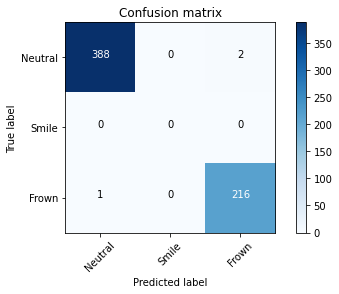

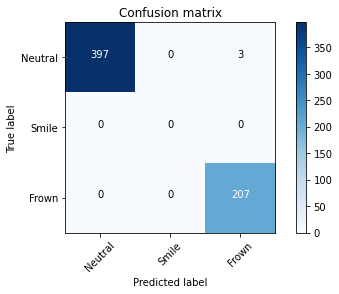

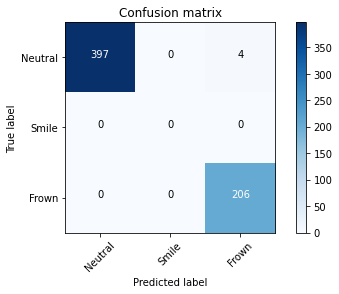

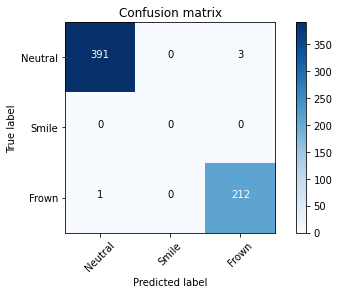

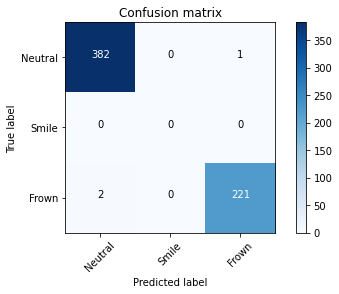

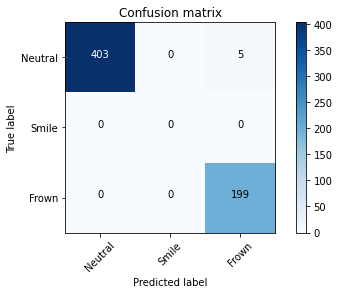

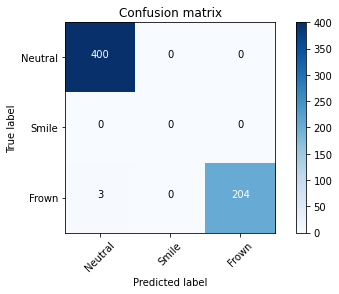

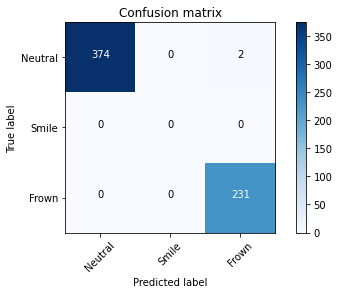

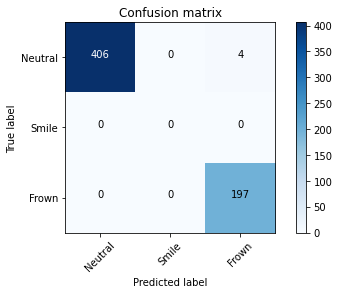

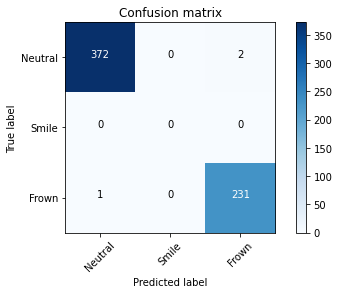

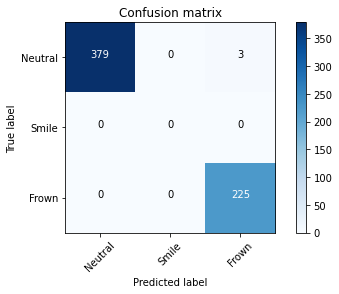

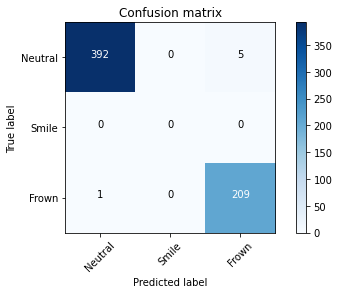

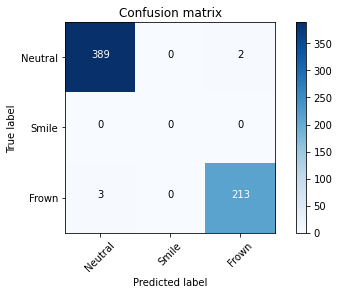

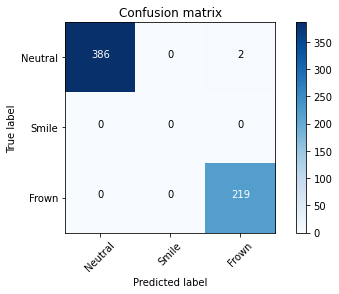

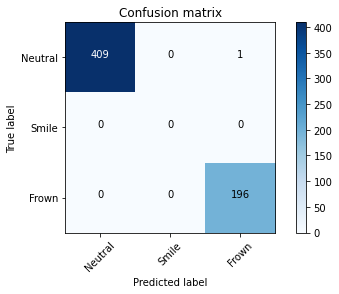

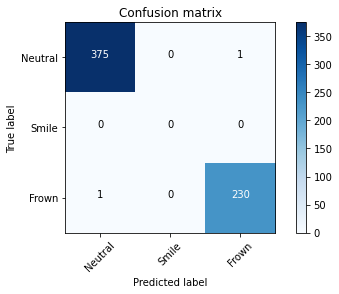

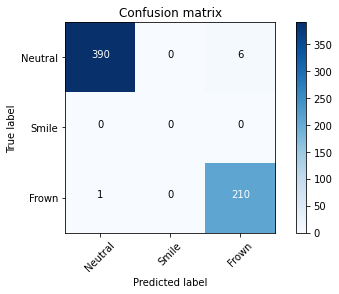

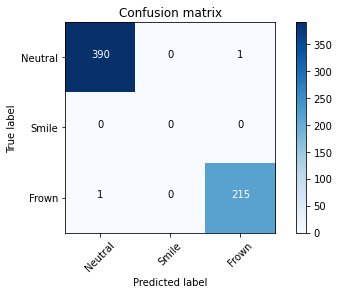

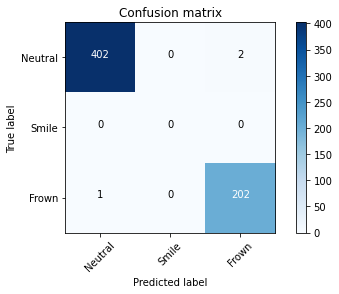

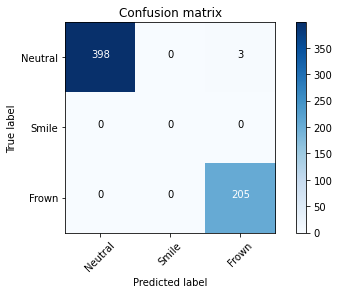

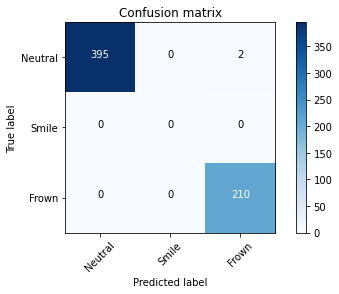

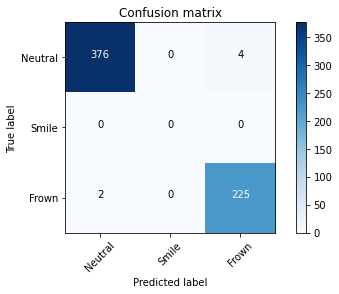

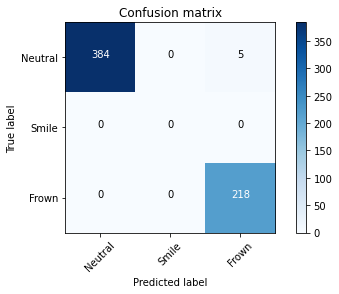

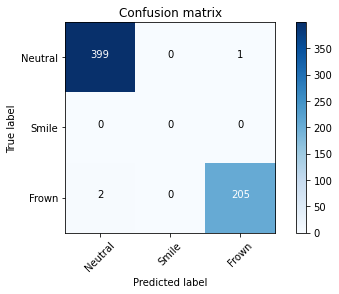

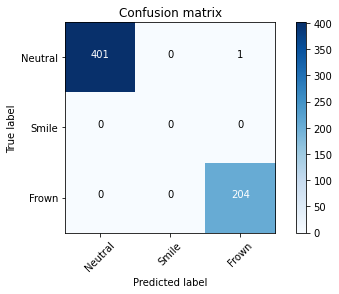

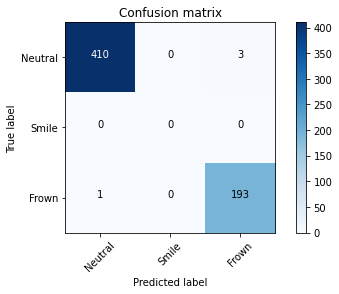

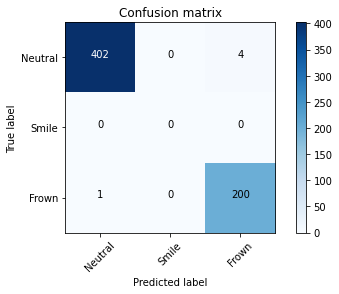

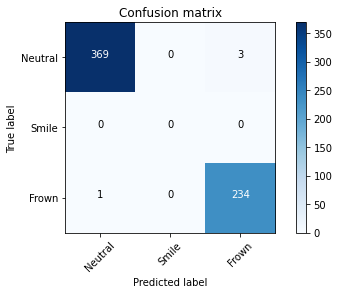

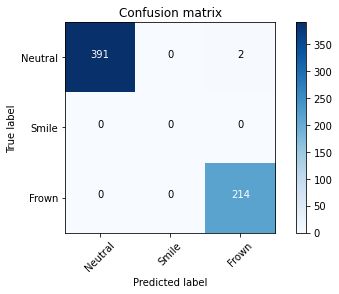

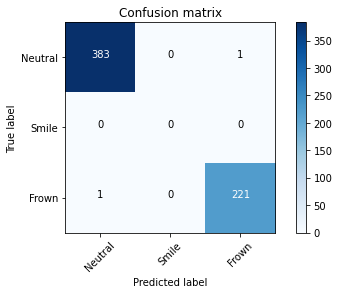

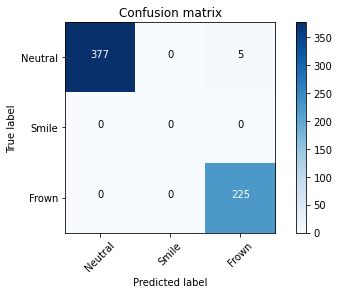

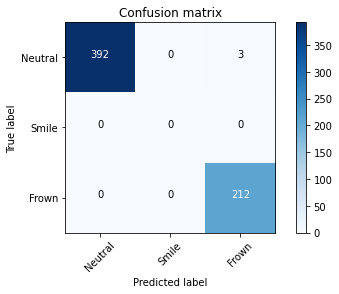

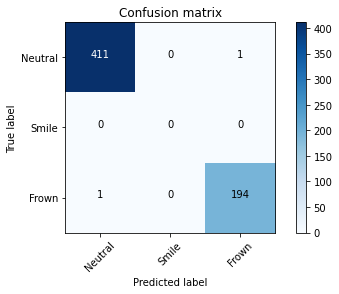

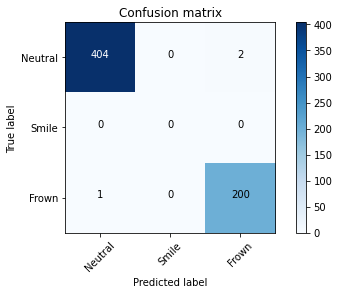

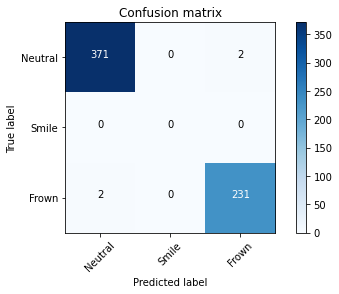

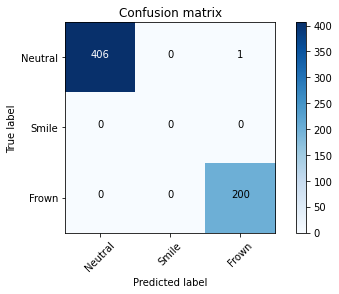

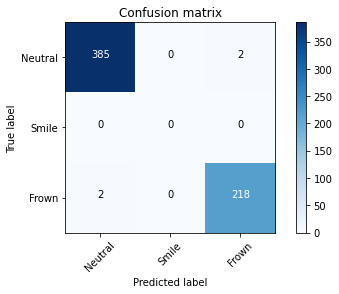

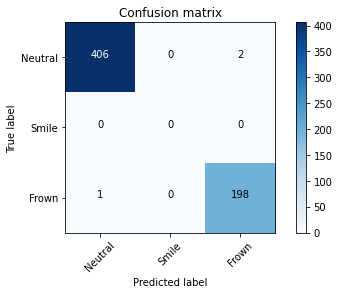

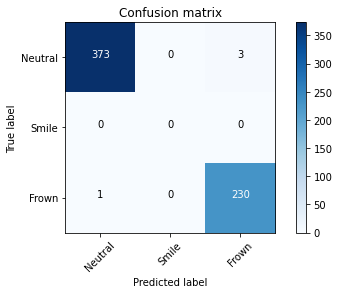

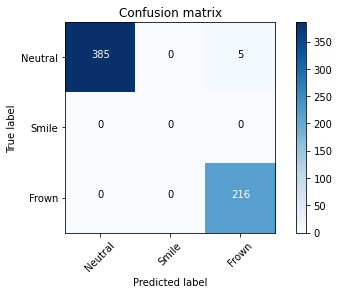

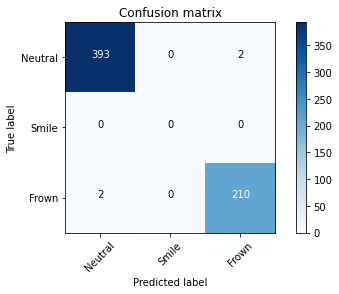

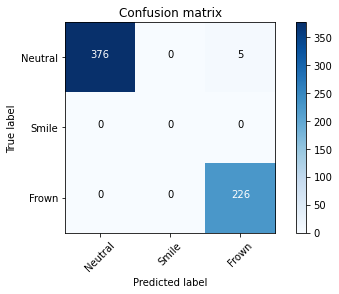

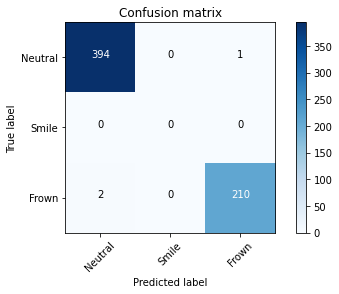

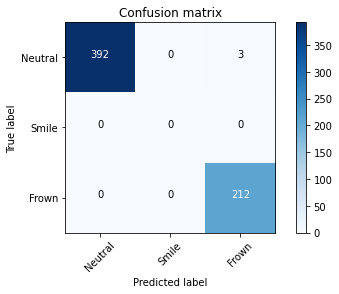

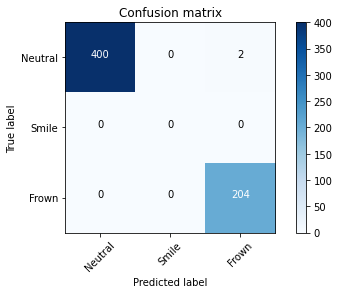

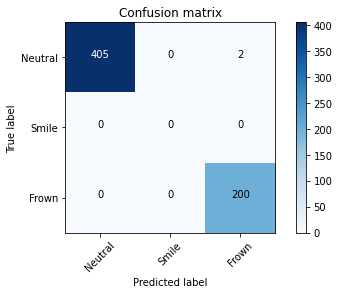

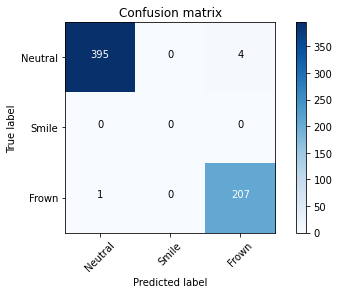

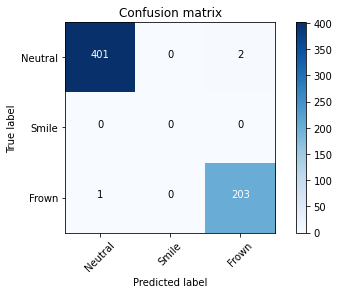

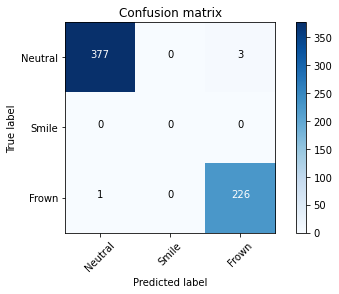

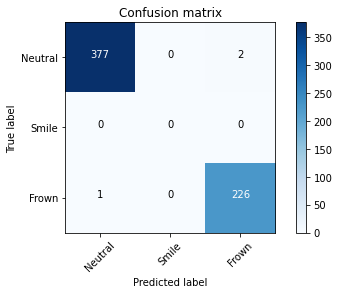

In [18]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in gb.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Neutral','Smile', 'Frown'],normalize= False,  title='Confusion matrix')


In [19]:
import pickle
with open('neutral_frown_gb_08.pkl', 'wb') as f:
    pickle.dump(gb['gb'], f)

In [20]:
import pickle
with open('neutral_frown_gb_08.pkl', 'rb') as f:
    model = pickle.load(f)

In [21]:
import cv2
import mediapipe
import numpy as np
import csv
cap = cv2.VideoCapture(0)

# facemesh

faceModule = mediapipe.solutions.face_mesh
mp_drawing = mediapipe.solutions.drawing_utils # Drawing helpers

circleDrawingSpec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mp_drawing.DrawingSpec(thickness=1, color=(0,255,0))
 
with faceModule.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = face.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                point_values = []

                for i in range(0, 468):
                    pt1 = faceLandmarks.landmark[i]

                    point_values.append(pt1.x)
                    point_values.append(pt1.y)
                    point_values.append(pt1.z)
                
                
                 # Make Detections
                X = pd.DataFrame([point_values])
                body_language_class = model.predict(X)[0]
                print(body_language_class)
                
                mp_drawing.draw_landmarks(image, faceLandmarks, faceModule.FACEMESH_CONTOURS, circleDrawingSpec, lineDrawingSpec)
 

                # Display Class
                cv2.putText(image, 'CLASS'
                            , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(body_language_class)
                            , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
2
2
0
2
2
2
2
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
#this one still has trouble distinguishing between frown and 